# Práctica 3 - Décima prueba

#### Pilar Navarro Ramírez

In [2]:
import pandas as pd

## Preprocesamiento

In [3]:
df_train=pd.read_csv("data/train.csv",na_values=[""])
df_test=pd.read_csv("data/test.csv",na_values=[""])

In [4]:
df_train.columns = [col.lower() for col in df_train]
df_test.columns = [col.lower() for col in df_test]

df_train_orig = df_train.copy()
df_test_orig = df_test.copy()

del df_train["id"]
del df_test["id"]

### Tratamos los datos perdidos

In [5]:
from sklearn import impute

In [6]:
del df_train['descuento']
del df_test['descuento']

In [7]:
df_train_replaced=df_train.copy()
imputer=impute.SimpleImputer(strategy="most_frequent")
values = imputer.fit_transform([df_train_replaced.asientos.values])
df_train_replaced.asientos.update(pd.Series(values[0]))

In [8]:
df_train_replaced=df_train_replaced.dropna()
df_train=df_train.dropna()

Separamos el atributo a predecir del resto de atributos en el conjunto de entrenamiento.

In [9]:
cols = [col for col in df_train.columns if col not in ['precio_cat']]    
df_train, df_train_obj= df_train[cols], df_train['precio_cat']
df_train_replaced, df_train_obj_replaced= df_train_replaced[cols], df_train_replaced['precio_cat']

### Nos quedamos sólo con la marca del nombre

In [10]:
nombre=pd.read_csv("data/nombre.csv")
nombre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1876 entries, 0 to 1875
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Nombre  1876 non-null   object
dtypes: object(1)
memory usage: 14.8+ KB


In [11]:
nombre.columns = [col.lower() for col in nombre]

#Función que se queda con la primera palabra de una cadena
def marca(cad):
    return cad.split(' ', 1)[0]

In [12]:
df_train.head()

,nombre,ciudad,año,kilometros,combustible,tipo_marchas,mano,consumo,motor_cc,potencia,asientos
0,Maruti Swift Dzire ZDI,G,2012.0,83000.0,Diesel,Manual,First,23.4 kmpl,1248 CC,74 bhp,5.0
1,Maruti Wagon R LXI Optional,I,2016.0,4800.0,Petrol,Manual,First,20.51 kmpl,998 CC,67.04 bhp,5.0
2,Mahindra KUV 100 mFALCON D75 K8,F,2016.0,26000.0,Diesel,Manual,First,25.32 kmpl,1198 CC,77 bhp,6.0
3,Hyundai i20 1.2 Magna,E,2013.0,56127.0,Petrol,Manual,First,18.5 kmpl,1197 CC,80 bhp,5.0
4,Honda Jazz 1.2 SV i VTEC,H,2017.0,41981.0,Petrol,Manual,First,18.7 kmpl,1199 CC,88.7 bhp,5.0


In [13]:
nombre.head(30)

,nombre
0,Ambassador Classic Nova Diesel
1,Audi A3 35 TDI Attraction
2,Audi A3 35 TDI Premium
3,Audi A3 35 TDI Premium Plus
4,Audi A3 35 TDI Technology
5,Audi A4 1.8 TFSI
6,Audi A4 1.8 TFSI Technology Edition
7,Audi A4 2.0 TDI
8,Audi A4 2.0 TDI 177 Bhp Premium Plus
9,Audi A4 2.0 TDI 177 Bhp Technology Edition


In [14]:
nombre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1876 entries, 0 to 1875
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   nombre  1876 non-null   object
dtypes: object(1)
memory usage: 14.8+ KB


### Normalización de los datos numéricos

In [15]:
from sklearn.preprocessing import MinMaxScaler

exc=["nombre","ciudad","combustible","tipo_marchas","mano","consumo","motor_cc","potencia",'precio_cat','id','descuento']
cols = [col for col in df_train_orig.columns if col not in exc]  


df_train_norm=df_train.copy()
df_train_norm_rpl=df_train_replaced.copy()
df_test_norm=df_test.copy()


for atributo in cols:
    data=pd.read_csv("data/"+atributo+".csv")
    data.columns = [col.lower() for col in data]
    scaler = MinMaxScaler().fit(data.values)
    train_values=df_train[atributo].values.reshape(-1,1)
    df_train_norm[atributo]=scaler.transform(train_values)
    train_values_rpl=df_train_replaced[atributo].values.reshape(-1,1)
    df_train_norm_rpl[atributo]=scaler.transform(train_values_rpl)
    test_values=df_test[atributo].values.reshape(-1,1)
    df_test_norm[atributo]=scaler.transform(test_values)
    

### 'Transformación' de variables categóricas a binarias

In [16]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np

categorical=["nombre","ciudad","combustible","tipo_marchas","mano","consumo","motor_cc","potencia"]
cols = [col for col in df_train.columns if col not in categorical]    

df_train_num=df_train_norm.copy()
df_train_num_rpl=df_train_norm_rpl.copy()
df_test_num=df_test_norm.copy()

df_train_num=np.array(df_train_num[cols])
df_train_num_rpl=np.array(df_train_num_rpl[cols])
df_test_num=np.array(df_test_num[cols])

for atributo in categorical:
    if atributo=='nombre':
        data=nombre.copy()
    else:
        data=pd.read_csv("data/"+atributo+".csv")
        data.columns = [col.lower() for col in data]
    enc = OneHotEncoder().fit(data[atributo].values.reshape(-1,1))

    #Conjunto de entrenamiento con ambos preprocesamientos
    enc_train=enc.transform(df_train[atributo].values.reshape(-1,1)).toarray()        
    df_train_num=np.hstack((df_train_num,enc_train))
    
    enc_train_rpl=enc.transform(df_train_replaced[atributo].values.reshape(-1,1)).toarray()
    df_train_num_rpl=np.hstack((df_train_num_rpl,enc_train_rpl))

    
    #Conjunto de test
    enc_test=enc.transform(df_test[atributo].values.reshape(-1,1)).toarray()
    df_test_num=np.hstack((df_test_num,enc_test))
                          
df_train_num=pd.DataFrame(df_train_num)
df_train_num_rpl=pd.DataFrame(df_train_num_rpl)
df_test_num=pd.DataFrame(df_test_num)

Eliminamos las columnas que son todo nula.

In [17]:
cols = [col for col in df_train_num.columns if df_train_num[col].max()!=0.0]
df_train_num=df_train_num[cols]
df_test_num=df_test_num[cols]
df_train_num_rpl=df_train_num_rpl[cols]

In [18]:
df_train_num.describe()

,0,1,2,5,6,7,8,9,10,11,...,2838,2839,2840,2841,2842,2843,2844,2845,2846,2847
count,4001.000000,4001.000000,4001.000000,4001.000000,4001.000000,4001.000000,4001.000000,4001.000000,4001.000000,4001.000000,...,4001.000000,4001.000000,4001.000000,4001.000000,4001.000000,4001.000000,4001.000000,4001.000000,4001.000000,4001.000000
mean,0.745302,0.009001,0.529468,0.000250,0.000250,0.000250,0.000250,0.000250,0.003249,0.002999,...,0.000250,0.000500,0.000750,0.002999,0.026243,0.000250,0.000500,0.001500,0.002749,0.001000
std,0.145271,0.016793,0.081295,0.015809,0.015809,0.015809,0.015809,0.015809,0.056916,0.054690,...,0.015809,0.022355,0.027376,0.054690,0.159878,0.015809,0.022355,0.038701,0.052368,0.031607
min,0.000000,0.000000,0.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.666667,0.005051,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.761905,0.008011,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.857143,0.011051,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [19]:
df_test_num.describe()

,0,1,2,5,6,7,8,9,10,11,...,2838,2839,2840,2841,2842,2843,2844,2845,2846,2847
count,1159.000000,1159.000000,1159.000000,1159.0,1159.0,1159.0,1159.000000,1159.0,1159.000000,1159.000000,...,1159.0,1159.000000,1159.000000,1159.000000,1159.000000,1159.0,1159.0,1159.000000,1159.000000,1159.0
mean,0.699618,0.009109,0.525798,0.0,0.0,0.0,0.000863,0.0,0.001726,0.002588,...,0.0,0.000863,0.000863,0.000863,0.009491,0.0,0.0,0.002588,0.005177,0.0
std,0.171870,0.005493,0.079172,0.0,0.0,0.0,0.029374,0.0,0.041523,0.050833,...,0.0,0.029374,0.029374,0.029374,0.097000,0.0,0.0,0.050833,0.071795,0.0
min,0.000000,0.000066,0.200000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0
25%,0.571429,0.005400,0.500000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0
50%,0.714286,0.008435,0.500000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0
75%,0.857143,0.011512,0.500000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0
max,1.000000,0.073822,0.800000,0.0,0.0,0.0,1.000000,0.0,1.000000,1.000000,...,0.0,1.000000,1.000000,1.000000,1.000000,0.0,0.0,1.000000,1.000000,0.0


### Oversampling

In [20]:
from imblearn.combine import SMOTETomek
from collections import Counter
smote=SMOTETomek(random_state=10)
df_train_over, df_train_obj_over = smote.fit_resample(df_train_num, df_train_obj)
df_train_over_rpl, df_train_obj_over_rpl = smote.fit_resample(df_train_num_rpl, df_train_obj_replaced)
Counter(df_train_obj_over)

Counter({3: 1753, 2: 1790, 4: 1777, 5: 1818, 1: 1821})

## Aplicación de los algoritmos

In [21]:
import numpy as np

from sklearn.model_selection import cross_val_score

def cross_validation(clf,x,y,mostrar=False):
    scores=cross_val_score(clf,x,y,scoring='accuracy',cv=5)
    accuracy=np.mean(scores)  
    if mostrar:
        print("Accuracy: ", accuracy)
    return accuracy

In [22]:
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier,GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier


extra=ExtraTreesClassifier(random_state=10)
gradient=GradientBoostingClassifier(random_state=10,max_features='auto')
svc=LinearSVC(random_state=10)
knn=KNeighborsClassifier()
tree=DecisionTreeClassifier(random_state=10)
forest=RandomForestClassifier(random_state=10)
NN=MLPClassifier(random_state=10,max_iter=10000)

clfs=[svc,knn,tree,forest,NN,extra,gradient]
for clf in clfs:
    print("One-hot-encoding: ")
    print(clf)
    cross_validation(clf, df_train_num, df_train_obj,True)
    print("Oversampling")
    print(clf)
    cross_validation(clf, df_train_over, df_train_obj_over,True)

One-hot-encoding: 
LinearSVC(random_state=10)
Accuracy:  0.7528117977528089
Oversampling
LinearSVC(random_state=10)
Accuracy:  0.8996565790260828
One-hot-encoding: 
KNeighborsClassifier()
Accuracy:  0.7485636704119851
Oversampling
KNeighborsClassifier()
Accuracy:  0.8716408804937386
One-hot-encoding: 
DecisionTreeClassifier(random_state=10)
Accuracy:  0.7433136704119852
Oversampling
DecisionTreeClassifier(random_state=10)
Accuracy:  0.8986532987357423
One-hot-encoding: 
RandomForestClassifier(random_state=10)
Accuracy:  0.7923014981273409
Oversampling
RandomForestClassifier(random_state=10)
Accuracy:  0.9445282588537927
One-hot-encoding: 
MLPClassifier(max_iter=10000, random_state=10)
Accuracy:  0.7550614856429464
Oversampling
MLPClassifier(max_iter=10000, random_state=10)
Accuracy:  0.9514472162399297
One-hot-encoding: 
ExtraTreesClassifier(random_state=10)
Accuracy:  0.774558052434457
Oversampling
ExtraTreesClassifier(random_state=10)
Accuracy:  0.95401486599665
One-hot-encoding: 
Gr

### Configuración de los parámetros

##### LinearSVC

In [23]:
from matplotlib import pyplot as plt

def tune_svc(max_value,data,obj):
    acc=[]
    for i in range(2,max_value):
        svc=LinearSVC(random_state=10,C=i,max_iter=100000)
        acc.append(cross_validation(svc,data,obj))

    fig, ax =plt.subplots(figsize=(15,5))
    ax.plot(range(2,max_value), acc)
    ax.set_title('Linear SVC')
    ax.set_xlabel('Valor parámetro')
    ax.set_ylabel('Accuracy')
    plt.show()

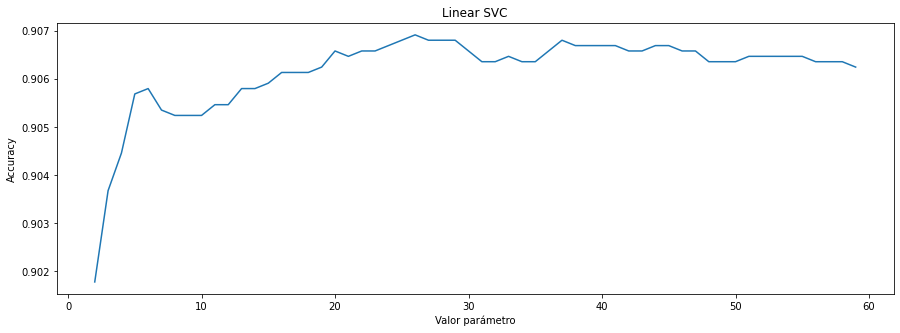

In [24]:
tune_svc(60,df_train_over,df_train_obj_over)

In [25]:
svc=LinearSVC(random_state=10,C=30,max_iter=100000,class_weight='balanced')
cross_validation(svc, df_train_over,df_train_obj_over,True)

Accuracy:  0.9064657987357421


0.9064657987357421

In [26]:
svc=LinearSVC(random_state=10,C=30,max_iter=100000)
cross_validation(svc, df_train_over,df_train_obj_over,True)

Accuracy:  0.9065773435630533


0.9065773435630533

In [27]:
svc=LinearSVC(random_state=10,C=27,max_iter=100000)
cross_validation(svc, df_train_over,df_train_obj_over,True)

Accuracy:  0.9068005578487677


0.9068005578487677

In [28]:
svc=LinearSVC(random_state=10,C=50,max_iter=100000)
cross_validation(svc, df_train_over,df_train_obj_over,True)

Accuracy:  0.906354129277339


0.906354129277339

In [29]:
svc=LinearSVC(random_state=10,C=50,max_iter=100000,class_weight='balanced')
cross_validation(svc, df_train_over,df_train_obj_over,True)

Accuracy:  0.9065773435630533


0.9065773435630533

#### Gradient Boosting

In [30]:
print("Fraction of samples to be used for fitting the individual base learners = 0.8")
gradient=GradientBoostingClassifier(random_state=10,max_features='auto',subsample=0.8)
cross_validation(gradient, df_train_over, df_train_obj_over,True)
print("Fraction of samples to be used for fitting the individual base learners = 0.6")
gradient=GradientBoostingClassifier(random_state=10,max_features='auto',subsample=0.6)
cross_validation(gradient,df_train_over, df_train_obj_over,True)
print("Fraction of samples to be used for fitting the individual base learners = 0.9")
gradient=GradientBoostingClassifier(random_state=10,max_features='auto',subsample=0.9)
cross_validation(gradient,df_train_over, df_train_obj_over,True)
print("Fraction of samples to be used for fitting the individual base learners = 0.7")
gradient=GradientBoostingClassifier(random_state=10,max_features='auto',subsample=0.7)
cross_validation(gradient,df_train_over, df_train_obj_over,True)
print("Fraction of samples to be used for fitting the individual base learners = 0.5")
gradient=GradientBoostingClassifier(random_state=10,max_features='auto',subsample=0.5)
cross_validation(gradient,df_train_over, df_train_obj_over,True)

Fraction of samples to be used for fitting the individual base learners = 0.8
Accuracy:  0.8700784428092845
Fraction of samples to be used for fitting the individual base learners = 0.6
Accuracy:  0.8700781935471007
Fraction of samples to be used for fitting the individual base learners = 0.9
Accuracy:  0.8734271556193667
Fraction of samples to be used for fitting the individual base learners = 0.7
Accuracy:  0.8706360423147483
Fraction of samples to be used for fitting the individual base learners = 0.5
Accuracy:  0.8661716942849166


0.8661716942849166

Configurando el parámetro max_depth de cada estimador.

In [31]:
def tune_gradient_boosting(max_value):
    acc=[]
    for i in range(2,max_value):
        gradient=GradientBoostingClassifier(max_depth=i,random_state=10,subsample=0.8)
        print(i)
        acc.append(cross_validation(gradient,df_train_over,df_train_obj_over,True))

    fig, ax =plt.subplots(figsize=(15,5))
    ax.plot(range(2,max_value), acc)
    ax.set_title('Gradient Boosting')
    ax.set_xlabel('Max depth')
    ax.set_ylabel('Accuracy')
    plt.show()

2
Accuracy:  0.814267829724017
3
Accuracy:  0.8700784428092845
4
Accuracy:  0.899880229520619
5
Accuracy:  0.9161766172130494
6
Accuracy:  0.9236558536731275
7
Accuracy:  0.9270044418521177
8
Accuracy:  0.928009030768924
9
Accuracy:  0.9299062898819495
10
Accuracy:  0.9310226105727049
11
Accuracy:  0.9322501645130414
12
Accuracy:  0.9349289228882508
13
Accuracy:  0.9352641182100981
14
Accuracy:  0.935152386436149
15
Accuracy:  0.9353756630374093
16
Accuracy:  0.936603279293292
17
Accuracy:  0.9360454305256442
18
Accuracy:  0.9364916721504347
19
Accuracy:  0.9358220916088378
20
Accuracy:  0.9352641182100981
21
Accuracy:  0.9366034039243838
22
Accuracy:  0.9360453058945521
23
Accuracy:  0.9357104844659807
24
Accuracy:  0.9363803765853076
25
Accuracy:  0.9362684578647205
26
Accuracy:  0.9354874571269043
27
Accuracy:  0.9369381630374093
28
Accuracy:  0.9349291721504347
29
Accuracy:  0.9369381630374093


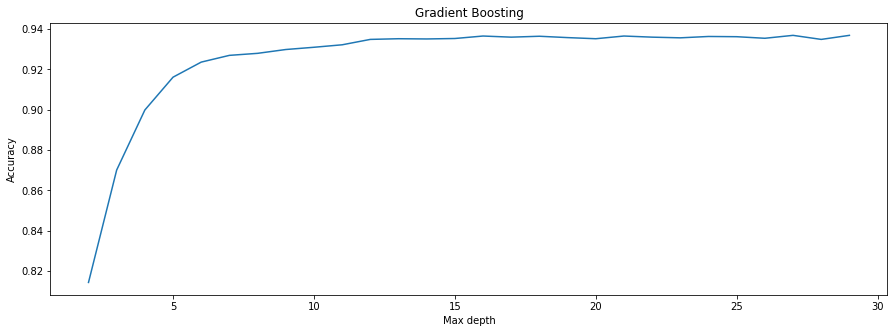

In [32]:
tune_gradient_boosting(30) 

Configurando el número de estimadores.

50
Accuracy:  0.932920305894552
100
Accuracy:  0.9358220916088378
150
Accuracy:  0.9377195376685012
200
Accuracy:  0.938389305156736
250
Accuracy:  0.9390589480138789
300
Accuracy:  0.9392820376685013
350
Accuracy:  0.9391704928411901


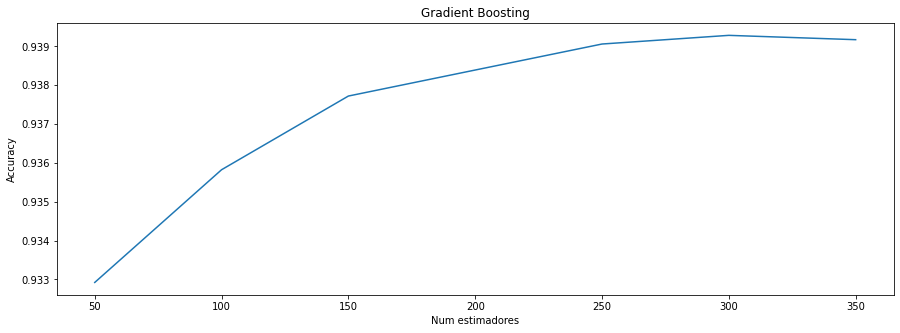

In [33]:
def tune_gradient_boosting_2(max_value):
    acc=[]
    for i in range(50,max_value,50):
        gradient=GradientBoostingClassifier(n_estimators=i,max_depth=19,random_state=10,subsample=0.8)
        print(i)
        acc.append(cross_validation(gradient,df_train_over,df_train_obj_over,True))

    fig, ax =plt.subplots(figsize=(15,5))
    ax.plot(range(50,max_value,50), acc)
    ax.set_title('Gradient Boosting')
    ax.set_xlabel('Num estimadores')
    ax.set_ylabel('Accuracy')
    plt.show()
tune_gradient_boosting_2(400) 

In [34]:
gradient=GradientBoostingClassifier(n_estimators=100, random_state=10,max_features='auto',subsample=0.8,max_depth=19)
cross_validation(gradient,df_train_over,df_train_obj_over,True)

Accuracy:  0.9358220916088378


0.9358220916088378

In [35]:
gradient=GradientBoostingClassifier(n_estimators=150, random_state=10,max_features='auto',subsample=0.8,max_depth=18)
cross_validation(gradient,df_train_over,df_train_obj_over,True)

Accuracy:  0.938389305156736


0.938389305156736

Configurando el parámetro learning_rate.

In [36]:
print("Learning rate=0.2")
gradient=GradientBoostingClassifier(n_estimators=100, learning_rate=0.2, random_state=10,max_features='auto',subsample=0.8,max_depth=19)
cross_validation(gradient,df_train_over,df_train_obj_over,True)
print("Learning rate=0.05")
gradient=GradientBoostingClassifier(n_estimators=100, learning_rate=0.05, random_state=10,max_features='auto',subsample=0.8,max_depth=19)
cross_validation(gradient,df_train_over,df_train_obj_over,True)
print("Learning rate=0.15")
gradient=GradientBoostingClassifier(n_estimators=100, learning_rate=0.15, random_state=10,max_features='auto',subsample=0.8,max_depth=19)
cross_validation(gradient,df_train_over,df_train_obj_over,True)
print("Learning rate=0.1")
gradient=GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=10,max_features='auto',subsample=0.8,max_depth=19)
cross_validation(gradient,df_train_over,df_train_obj_over,True)

Learning rate=0.2
Accuracy:  0.9362685824958124
Learning rate=0.05
Accuracy:  0.9333662982571589
Learning rate=0.15
Accuracy:  0.9368270544189199
Learning rate=0.1
Accuracy:  0.9358220916088378


0.9358220916088378

#### Red neuronal

In [37]:
def tune_layers(max_value):
    acc=[]
    for i in range(20,max_value,20):
        NN=MLPClassifier(hidden_layer_sizes=(i,i),random_state=10,max_iter=1000)
        print(i)
        acc.append(cross_validation(NN,df_train_over,df_train_obj_over,True))

    fig, ax =plt.subplots(figsize=(15,5))
    ax.plot(range(20,max_value,20), acc)
    ax.set_title('Neural Network')
    ax.set_xlabel('Tamaño capas')
    ax.set_ylabel('Accuracy')
    plt.show()

20
Accuracy:  0.9528988568836244
40
Accuracy:  0.9539029472760628
60
Accuracy:  0.9520051896386695
80
Accuracy:  0.9503309578647204
100
Accuracy:  0.9539031965382468
120
Accuracy:  0.9535680012163995
140
Accuracy:  0.9543493135319453
160
Accuracy:  0.9501074943168222
180
Accuracy:  0.9535679389008533
200
Accuracy:  0.9525637238773232
220
Accuracy:  0.9550188317579963
240
Accuracy:  0.9514464061378319
260
Accuracy:  0.9528970497327908
280
Accuracy:  0.953790467715562
300
Accuracy:  0.9531215103294249
320
Accuracy:  0.9536792344659807
340
Accuracy:  0.9555763689479141
360
Accuracy:  0.9521168590970726
380
Accuracy:  0.9559118758474915
400
Accuracy:  0.9555758704235464
420
Accuracy:  0.9511123324958124
440
Accuracy:  0.9535671911143018
460
Accuracy:  0.9540138689479141
480
Accuracy:  0.954014679050012


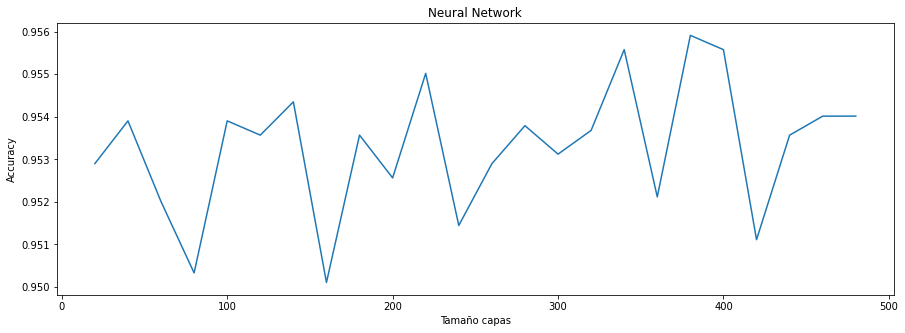

In [38]:
tune_layers(500)

In [39]:
NN=MLPClassifier(hidden_layer_sizes=(480,480),random_state=10,max_iter=10000)
cross_validation(NN,df_train_over,df_train_obj_over,True)

Accuracy:  0.954014679050012


0.954014679050012

In [40]:
NN=MLPClassifier(hidden_layer_sizes=(460,460),random_state=10,max_iter=1000)
cross_validation(NN,df_train_over,df_train_obj_over,True)

Accuracy:  0.9540138689479141


0.9540138689479141

In [41]:
print("Alpha=0.0015")
NN=MLPClassifier(hidden_layer_sizes=(460,460),random_state=10,max_iter=1000,alpha=0.0015)
cross_validation(NN,df_train_over,df_train_obj_over,True)
print("Alpha=0.01")
NN=MLPClassifier(hidden_layer_sizes=(460,460),random_state=10,max_iter=1000,alpha=0.01)
cross_validation(NN,df_train_over,df_train_obj_over,True)
print("Alpha=0.02")
NN=MLPClassifier(hidden_layer_sizes=(460,460),random_state=10,max_iter=1000,alpha=0.02)
cross_validation(NN,df_train_over,df_train_obj_over,True)
print("Alpha=0.05")
NN=MLPClassifier(hidden_layer_sizes=(460,460),random_state=10,max_iter=1000,alpha=0.05)
cross_validation(NN,df_train_over,df_train_obj_over,True)
print("Alpha=0.003")
NN=MLPClassifier(hidden_layer_sizes=(460,460),random_state=10,max_iter=1000,alpha=0.003)
cross_validation(NN,df_train_over,df_train_obj_over,True)
print("Alpha=0.1")
NN=MLPClassifier(hidden_layer_sizes=(460,460),random_state=10,max_iter=1000,alpha=0.1)
cross_validation(NN,df_train_over,df_train_obj_over,True)
print("Alpha=0.015")
NN=MLPClassifier(hidden_layer_sizes=(460,460),random_state=10,max_iter=1000,alpha=0.015)
cross_validation(NN,df_train_over,df_train_obj_over,True)
print("Alpha=0.009")
NN=MLPClassifier(hidden_layer_sizes=(460,460),random_state=10,max_iter=1000,alpha=0.009)
cross_validation(NN,df_train_over,df_train_obj_over,True)

Alpha=0.0015
Accuracy:  0.9543490642697616
Alpha=0.01
Accuracy:  0.9570274487516951
Alpha=0.02
Accuracy:  0.9588137861928692
Alpha=0.05
Accuracy:  0.9547943088458165
Alpha=0.003
Accuracy:  0.9570276356983329
Alpha=0.1
Accuracy:  0.9584795879197575
Alpha=0.015
Accuracy:  0.9579201812634601
Alpha=0.009
Accuracy:  0.9568047953058946


0.9568047953058946

In [42]:
print("Alpha=0.0095")
NN=MLPClassifier(hidden_layer_sizes=(460,460),random_state=10,max_iter=1000,alpha=0.0095)
cross_validation(NN,df_train_over,df_train_obj_over,True)
print("Alpha=0.008")
NN=MLPClassifier(hidden_layer_sizes=(460,460),random_state=10,max_iter=1000,alpha=0.008)
cross_validation(NN,df_train_over,df_train_obj_over,True)

Alpha=0.0095
Accuracy:  0.9547945581080004
Alpha=0.008
Accuracy:  0.9568040475193428


0.9568040475193428

### Aplicación al conjunto de test

#### **Entrega 14**

In [43]:
forest=RandomForestClassifier(random_state=10)
cross_validation(forest, df_train_over,df_train_obj_over,True)
forest.fit(df_train_over,df_train_obj_over)
pred=forest.predict(df_test_num)
ids=df_test_orig["id"]

df_result = pd.DataFrame({'id': ids, 'Precio_cat': pred})
df_result.to_csv("resultados_14.csv", index=False)

Accuracy:  0.9445282588537927


#### Entrega 15

In [44]:
svc=LinearSVC(random_state=10,C=50,max_iter=100000)
cross_validation(svc, df_train_over,df_train_obj_over,True)
svc.fit(df_train_over,df_train_obj_over)
pred=svc.predict(df_test_num)
ids=df_test_orig["id"]

df_result = pd.DataFrame({'id': ids, 'Precio_cat': pred})
df_result.to_csv("resultados_15.csv", index=False)

Accuracy:  0.906354129277339


#### Entrega 16

In [45]:
NN=MLPClassifier(hidden_layer_sizes=(460,460),random_state=10,max_iter=10000,alpha=0.009)
cross_validation(NN,df_train_over,df_train_obj_over,True)
NN.fit(df_train_over,df_train_obj_over)
pred=NN.predict(df_test_num)
ids=df_test_orig["id"]

df_result = pd.DataFrame({'id': ids, 'Precio_cat': pred})
df_result.to_csv("resultados_16.csv", index=False)

Accuracy:  0.9568047953058946


#### Entrega 17

In [46]:
gradient=GradientBoostingClassifier(learning_rate=0.1,n_estimators=100, random_state=10,max_features='auto',subsample=0.8,max_depth=19)
cross_validation(gradient,df_train_over,df_train_obj_over,True)
gradient.fit(df_train_over,df_train_obj_over)
pred=gradient.predict(df_test_num)
ids=df_test_orig["id"]

df_result = pd.DataFrame({'id': ids, 'Precio_cat': pred})
df_result.to_csv("resultados_17.csv", index=False)

Accuracy:  0.9358220916088378
